# Install and import dependencies

In [8]:
!pip install mediapipe opencv-python pandas scikit-learn

In [1]:
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt

# Set up media pipe
mp_drawing = mp.solutions.drawing_utils
# Import pose estimation model
mp_pose = mp.solutions.pose

In [2]:
from sklearn.preprocessing import StandardScaler

# Assuming X is your feature matrix
scaler = StandardScaler()
#X_normalized = scaler.fit_transform(X)

# Backhand phases

In [7]:
EXPORT_PATH = r'data\5_flick_phases.csv'

In [13]:
landmarks = ['class']
for val in range(1, 33+1):
    landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val), 'v{}'.format(val)]

In [14]:
with open(EXPORT_PATH, mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

In [12]:
import csv
import numpy as np

def export_landmark(results, phase):
    try:
        keypoints = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten()
        keypoints = keypoints.astype(object)
        keypoints = np.insert(keypoints, 0, phase)
        
        with open(EXPORT_PATH, mode='a', newline='') as f:
            csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
            csv_writer.writerow(keypoints)

    except Exception as e:
        print(f"An error occurred: {e}")

In [15]:
video_path = r'videos\5_flick_short_front.mp4'
cap = cv2.VideoCapture(video_path)

# Get the original video width and height
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
target_height = 720

# Calculate the aspect ratio
aspect_ratio = width / height

# Calculate the new width based on the target height and original aspect ratio
target_width = int(target_height * aspect_ratio)


with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    # Variables for frame navigation
    current_frame = 0
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    while cap.isOpened():
        ret, frame = cap.read()
        
        if not ret:
            print("End of video.")
            break  # Exit the loop when the video is finished.
        

        frame = cv2.resize(frame, (target_width, target_height))
        # Recolor image
        # default of opencv is rgb, that's why we recolor
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        # set the image to not be modified and save memory
        image.flags.writeable = False
        
        # Make detection
        results = pose.process(image) # get detection of pose
        
        # Recolor back to BGR for opencv
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        landmarks_results = results.pose_landmarks.landmark
        
        # draw_landmarks
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
        
        # draw_landmarks window
        landmarks_image = np.zeros_like(image)  # Create a black image
        mp_drawing.draw_landmarks(landmarks_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
        

        cv2.imshow('Video', image)
        cv2.imshow('Data', landmarks_image)

        k = cv2.waitKey(0)  # Wait for a key press
        if k == ord('q'):
            break
        elif k == ord('n'):  # Move to the next frame
            current_frame += 1
            if current_frame >= total_frames:
                current_frame = total_frames - 1
            cap.set(cv2.CAP_PROP_POS_FRAMES, current_frame)
        elif k == ord('p'):  # Move to the previous frame
            current_frame -= 1
            if current_frame < 0:
                current_frame = 0
            cap.set(cv2.CAP_PROP_POS_FRAMES, current_frame)
        elif k == ord('1'):  # Capture the release point
            export_landmark(results, 'preparation')
            current_frame += 1
            if current_frame >= total_frames:
                current_frame = total_frames - 1
            cap.set(cv2.CAP_PROP_POS_FRAMES, current_frame)
        elif k == ord('2'):  # Capture the release point
            export_landmark(results, 'loading')
            current_frame += 1
            if current_frame >= total_frames:
                current_frame = total_frames - 1
            cap.set(cv2.CAP_PROP_POS_FRAMES, current_frame)
        elif k == ord('3'):  # Capture the release point
            export_landmark(results, 'release')
            current_frame += 1
            if current_frame >= total_frames:
                current_frame = total_frames - 1
            cap.set(cv2.CAP_PROP_POS_FRAMES, current_frame)
        elif k == ord('4'):  # Capture the release point
            export_landmark(results, 'follow')
            current_frame += 1
            if current_frame >= total_frames:
                current_frame = total_frames - 1
            cap.set(cv2.CAP_PROP_POS_FRAMES, current_frame)

            

    # Release the video capture object and close the window
    cap.release()
    cv2.destroyAllWindows()

# Anlysis

In [76]:
import pandas as pd

In [79]:
csv_results = pd.read_csv('data\\5_backhand_phases_1.csv') 

In [80]:
csv_results

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,preparation,0.445881,0.348113,-0.206969,0.999988,0.452615,0.342187,-0.190722,0.999960,0.456759,...,0.122712,0.930235,0.524166,0.614157,-0.056212,0.990734,0.359526,0.610748,-0.017544,0.991672
1,preparation,0.445171,0.354891,-0.228327,0.999988,0.451267,0.348994,-0.211235,0.999961,0.455261,...,0.132494,0.930844,0.525950,0.620861,-0.048794,0.990670,0.357826,0.617060,-0.009796,0.991575
2,preparation,0.441894,0.359770,-0.200257,0.999989,0.447971,0.353768,-0.184593,0.999964,0.452180,...,0.119376,0.931125,0.526917,0.625877,-0.075133,0.990715,0.357815,0.622463,-0.019111,0.991498
3,preparation,0.440179,0.363785,-0.186440,0.999990,0.446652,0.357958,-0.169767,0.999967,0.450855,...,0.121690,0.930449,0.528719,0.629331,-0.065466,0.990828,0.359635,0.626833,-0.017349,0.991442
4,preparation,0.437917,0.367473,-0.192398,0.999990,0.444231,0.362038,-0.176369,0.999969,0.448283,...,0.122956,0.931655,0.528836,0.632950,-0.067019,0.991060,0.360013,0.631517,-0.014881,0.991558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,follow,0.662633,0.429554,-0.347085,0.999998,0.663251,0.423780,-0.326764,0.999995,0.665483,...,-0.113670,0.989677,0.504831,0.638193,0.339552,0.970494,0.762275,0.644931,-0.196304,0.995888
117,follow,0.654000,0.425920,-0.377975,0.999998,0.654436,0.419880,-0.356368,0.999995,0.656873,...,-0.097224,0.990380,0.506964,0.637056,0.349747,0.970034,0.761273,0.644747,-0.181725,0.996191
118,follow,0.646206,0.422247,-0.376863,0.999998,0.646643,0.416096,-0.354296,0.999995,0.648938,...,-0.110813,0.991070,0.505274,0.635532,0.351609,0.971328,0.758332,0.644701,-0.211382,0.996515
119,follow,0.635622,0.417403,-0.363946,0.999998,0.636326,0.411609,-0.339511,0.999995,0.638855,...,-0.114441,0.991618,0.506746,0.634240,0.379620,0.972446,0.753761,0.644365,-0.213879,0.996806


In [98]:
csv_results[['class','x1', 'y1', 'z1', 'v1']]

,class,x1,y1,z1,v1
0,preparation,0.445881,0.348113,-0.206969,0.999988
1,preparation,0.445171,0.354891,-0.228327,0.999988
2,preparation,0.441894,0.359770,-0.200257,0.999989
3,preparation,0.440179,0.363785,-0.186440,0.999990
4,preparation,0.437917,0.367473,-0.192398,0.999990
...,...,...,...,...,...
116,follow,0.662633,0.429554,-0.347085,0.999998
117,follow,0.654000,0.425920,-0.377975,0.999998
118,follow,0.646206,0.422247,-0.376863,0.999998
119,follow,0.635622,0.417403,-0.363946,0.999998


In [147]:
csv_results[csv_results['class'] == 'release']['x11'].mean()

0.7245025396347046

In [125]:
csv_results[csv_results['class'] == 'follow'][['x11', 'y11']]

,x11,y11
60,0.704371,0.415826
61,0.705824,0.416912
62,0.707004,0.417844
63,0.705403,0.418314
64,0.704464,0.418123
65,0.703711,0.418030
66,0.699732,0.418163
67,0.693977,0.418024
68,0.688460,0.417850
69,0.681902,0.416970


In [109]:
csv_results[csv_results['class'] == 'follow'].describe()#'x28', 'y28']].describe()

,x1,y1,z1,v1,x2,y2,z2,v2,x3,y3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,...,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,0.692127,0.421696,-0.273542,0.999997,0.692291,0.416153,-0.248330,0.999992,0.694493,0.415934,...,-0.013179,0.983891,0.508975,0.635219,0.237127,0.973442,0.756973,0.642269,-0.066039,0.994010
std,0.027891,0.011629,0.052063,0.000001,0.027458,0.011637,0.053457,0.000003,0.027391,0.011530,...,0.076125,0.005409,0.018120,0.002724,0.078998,0.002227,0.027957,0.003105,0.100129,0.001778
min,0.627164,0.406808,-0.377975,0.999994,0.627907,0.401091,-0.356368,0.999984,0.630359,0.400877,...,-0.129345,0.972483,0.483020,0.630577,0.125726,0.969325,0.657481,0.637783,-0.226744,0.990605
25%,0.678724,0.411391,-0.303360,0.999996,0.679520,0.405931,-0.278183,0.999991,0.681679,0.405957,...,-0.084448,0.980138,0.497281,0.632799,0.171393,0.971851,0.750723,0.638731,-0.168980,0.992799
50%,0.699431,0.417403,-0.252942,0.999997,0.698341,0.411609,-0.224436,0.999993,0.700371,0.411068,...,-0.014844,0.984556,0.506964,0.635688,0.209659,0.973772,0.760039,0.644365,-0.060036,0.994163
75%,0.712487,0.434327,-0.236811,0.999998,0.712448,0.429119,-0.210992,0.999994,0.714422,0.428801,...,0.038764,0.987492,0.515272,0.637692,0.308790,0.975310,0.765709,0.644925,0.008045,0.995037
max,0.736283,0.436861,-0.186044,0.999998,0.734883,0.431174,-0.164725,0.999996,0.737211,0.430983,...,0.117459,0.992175,0.548238,0.638552,0.379620,0.976852,0.814310,0.645551,0.091234,0.997061


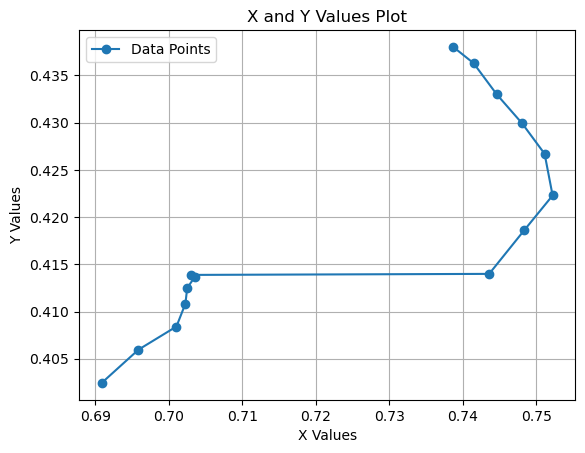

In [150]:
import matplotlib.pyplot as plt

# Example data
x_values = csv_results[csv_results['class'] == 'release']['x11']
y_values = csv_results[csv_results['class'] == 'release']['y11']

# Plot x and y values
plt.plot(x_values, y_values, label='Data Points', marker='o', linestyle='-')

# Customize the plot
plt.title('X and Y Values Plot')
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.legend()  # Show legend with label 'Data Points'
plt.grid(True)

# Show the plot
plt.show()

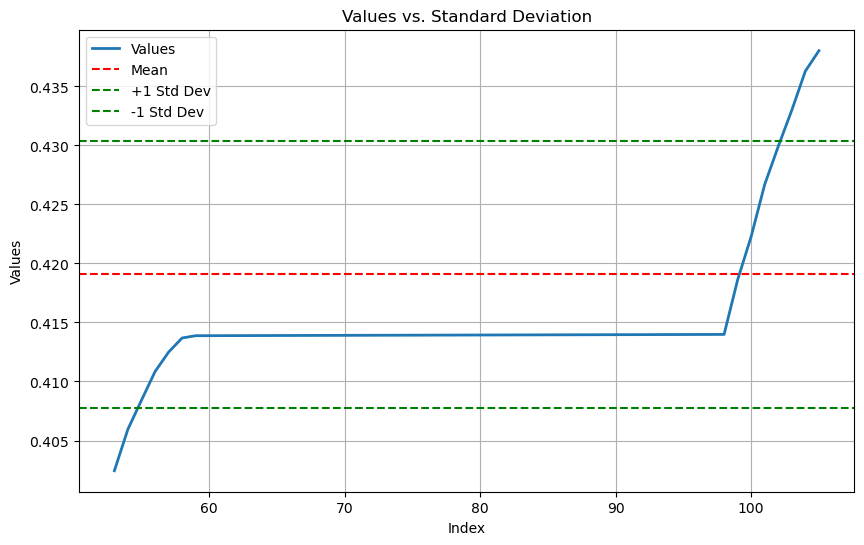

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

right_shoulder = csv_results[csv_results['class'] == 'release']['y11']#[['x11', 'y11', 'z11', 'v11']]

# Calculate the mean and standard deviation
mean_value = right_shoulder.mean()
std_deviation = right_shoulder.std()

# Plot the values and overlay the standard deviation
plt.figure(figsize=(10, 6))

# Normalize the values using z-score
normalized_right_shoulder = (right_shoulder - mean_value) / std_deviation

# Plot the values
right_shoulder.plot(label='Values', linewidth=2)

# Plot the normalized values
#normalized_right_shoulder.plot(label='Normalized Values', linewidth=2)

# Overlay mean
plt.axhline(y=mean_value, color='r', linestyle='--', label='Mean')

# Overlay +/- one standard deviation
plt.axhline(y=mean_value + std_deviation, color='g', linestyle='--', label='+1 Std Dev')
plt.axhline(y=mean_value - std_deviation, color='g', linestyle='--', label='-1 Std Dev')

# Customize the plot
plt.title('Values vs. Standard Deviation')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [122]:
csv_results[csv_results['class'] == 'follow']['x11', 'y11', 'z11', 'v11']

KeyError: ('x11', 'y11', 'z11', 'v11')

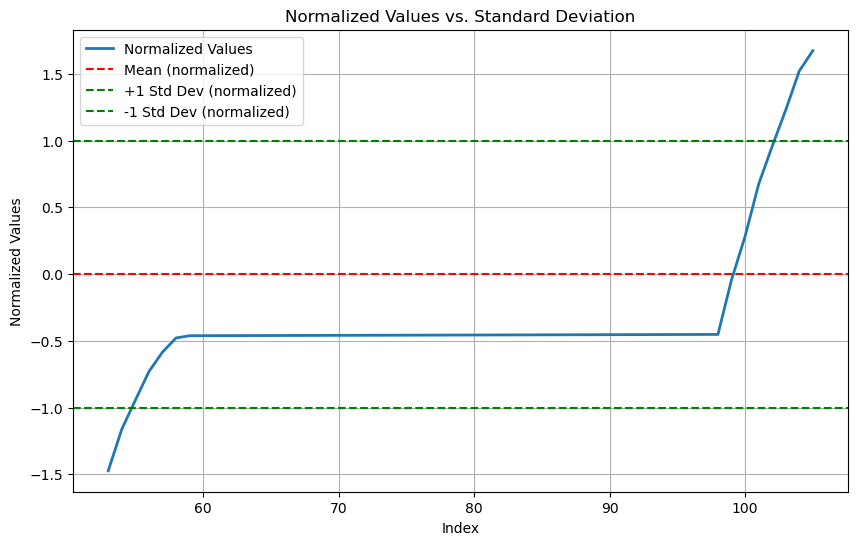

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Extract right_shoulder data
right_shoulder = csv_results[csv_results['class'] == 'release']['y11']

# Calculate the mean and standard deviation
mean_value = right_shoulder.mean()
std_deviation = right_shoulder.std()

# Normalize the values using z-score
normalized_right_shoulder = (right_shoulder - mean_value) / std_deviation

# Plot the normalized values and overlay the standard deviation
plt.figure(figsize=(10, 6))

# Plot the normalized values
normalized_right_shoulder.plot(label='Normalized Values', linewidth=2)

# Overlay mean
plt.axhline(y=0, color='r', linestyle='--', label='Mean (normalized)')

# Overlay +/- one standard deviation
plt.axhline(y=1, color='g', linestyle='--', label='+1 Std Dev (normalized)')
plt.axhline(y=-1, color='g', linestyle='--', label='-1 Std Dev (normalized)')

# Customize the plot
plt.title('Normalized Values vs. Standard Deviation')
plt.xlabel('Index')
plt.ylabel('Normalized Values')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

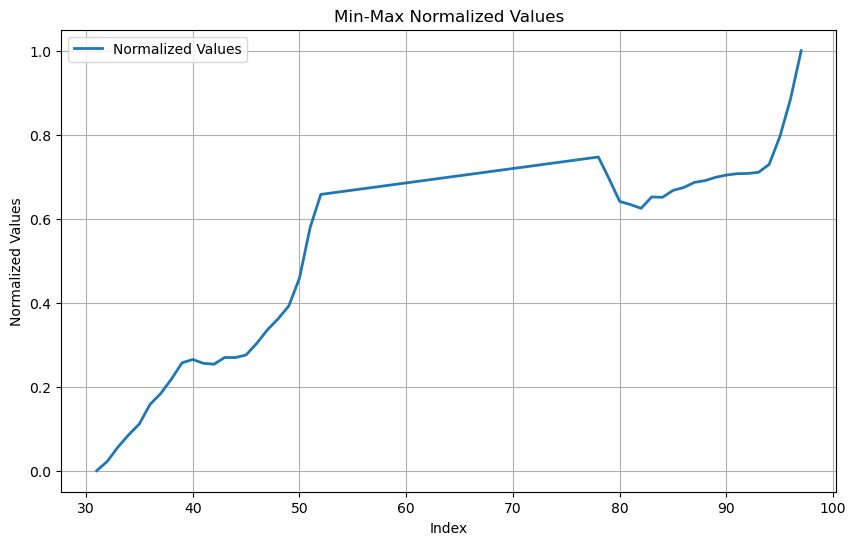

In [146]:
# Extract right_shoulder data
right_shoulder = csv_results[csv_results['class'] == 'loading']['y11']

# Perform Min-Max normalization
min_value = right_shoulder.min()
max_value = right_shoulder.max()
normalized_right_shoulder = (right_shoulder - min_value) / (max_value - min_value)

# Plot the normalized values
plt.figure(figsize=(10, 6))
normalized_right_shoulder.plot(label='Normalized Values', linewidth=2)

# Customize the plot
plt.title('Min-Max Normalized Values')
plt.xlabel('Index')
plt.ylabel('Normalized Values')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [145]:
csv_results['class'].values

array(['preparation', 'preparation', 'preparation', 'preparation',
       'preparation', 'preparation', 'preparation', 'preparation',
       'preparation', 'preparation', 'preparation', 'preparation',
       'preparation', 'preparation', 'preparation', 'preparation',
       'preparation', 'preparation', 'preparation', 'preparation',
       'preparation', 'preparation', 'preparation', 'preparation',
       'preparation', 'preparation', 'preparation', 'preparation',
       'preparation', 'preparation', 'preparation', 'loading', 'loading',
       'loading', 'loading', 'loading', 'loading', 'loading', 'loading',
       'loading', 'loading', 'loading', 'loading', 'loading', 'loading',
       'loading', 'loading', 'loading', 'loading', 'loading', 'loading',
       'loading', 'loading', 'release', 'release', 'release', 'release',
       'release', 'release', 'release', 'follow', 'follow', 'follow',
       'follow', 'follow', 'follow', 'follow', 'follow', 'follow',
       'follow', 'follow', '